In [1]:
# Khai báo sử dụng hàm sobel
from matplotlib import pyplot as plt
from skimage.filters import sobel
from skimage import color
import os

In [2]:
path = os.path.abspath("video/san_pham.mp4")
path1 = os.path.abspath("image/vo.jpg")
image1 = plt.imread(path1)

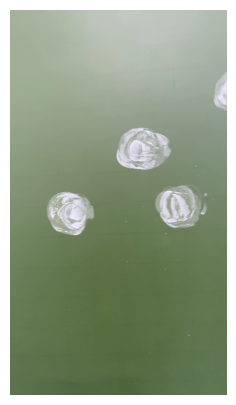

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
cap = cv2.VideoCapture(path)
frame_index = 100 
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
ret, frame = cap.read()
image1 = frame
if  ret:
        fig = plt.figure(figsize=(10, 5))
        plt.imshow(frame)
        plt.axis('off')
        plt.show()
        cap.release()
else:
    print('Không thể đọc khung hình thứ {} từ video.'.format(frame_index))

In [4]:
# Bài 2.1: Phát hiệ cạnh
def plot_comparison(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title("original")
    ax1.axis("off")
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis("off")

In [5]:
def show_image(image, title='Image', cmap_type='gray'):  
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)  
    plt.axis('off')  
    plt.show()

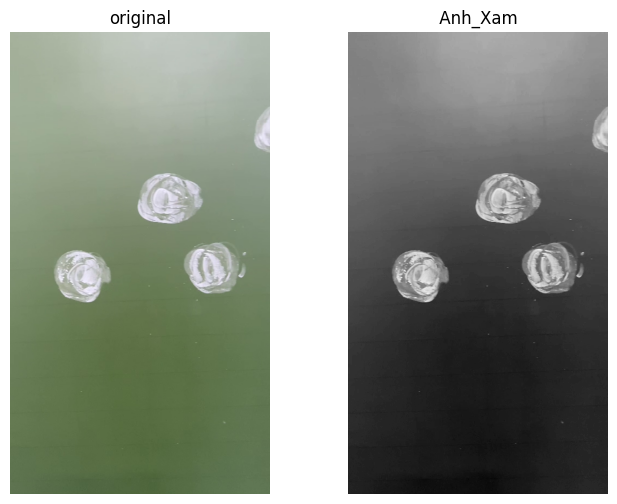

In [6]:
# Chuyển ảnh gốc thành ảnh xám
from skimage import color
image20= color.rgb2gray(image1)
plot_comparison(image1, image20, " Anh_Xam ")

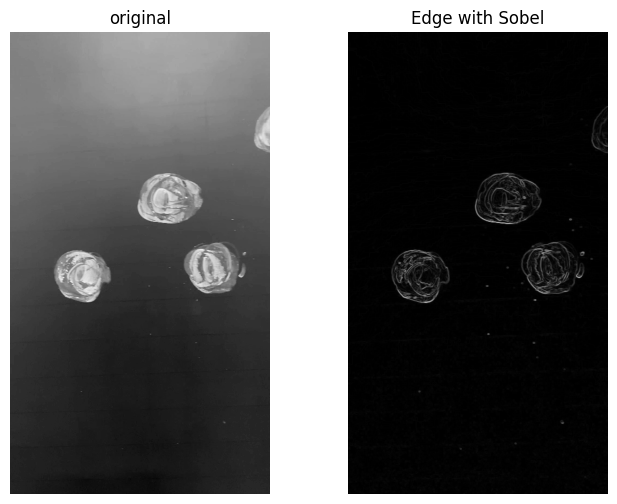

In [9]:
# Áp dụng hàm sobel để lọc cạnh
edge_sobel = sobel(image20)
plot_comparison(image20, edge_sobel, "Edge with Sobel")

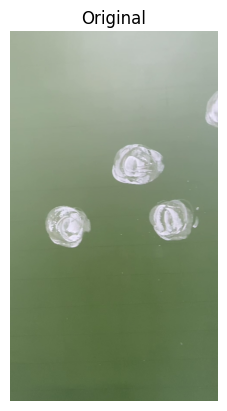

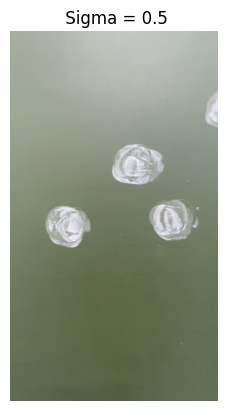

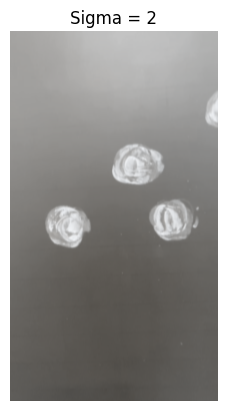

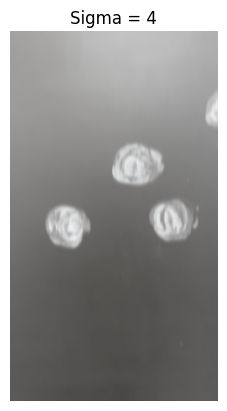

In [10]:
#Bài 2
# Khai báo sử dụng bộ lọc Gaussian
from skimage.filters import gaussian
# Áp dụng bộ lọc 
gaussian_image1 = gaussian(image1,sigma=4,channel_axis=True)
gaussian_image2 = gaussian(image1,sigma=0.5,channel_axis=True)
gaussian_image = gaussian(image1,sigma=2,channel_axis=True)
# Hiển thị ảnh gốc và ảnh kết quả 
show_image(image1, "Original")
show_image(gaussian_image2, " Sigma = 0.5")
show_image(gaussian_image, "Sigma = 2")
show_image(gaussian_image1, "Sigma = 4")


In [ ]:
#Bài 4
# Khai báo các thư viện cần dùng
from skimage import exposure
# Tiến hành cân bằng lược đồ mức xám
image_eq = exposure.equalize_hist(image_gray)
# hiển thị ảnh gốc và ảnh kết quả
show_image(image_gray, 'Original')
show_image(image_eq, 'Resulting image')

In [ ]:
#Bài 5
# khai báo thư viện cần thiết

# Đọc ảnh 
#Thực hiện cân bằng lược đồ mức xám cho ảnh 
plt.hist(image_gray.ravel(), bins=256)
# Đặt tên cho khung hình và hiển thị
plt.title('Gray Histogram')
plt.figure()
plt.axis('off')  
plt.imshow(image_gray)
# chuẩn hóa ảnh DICOM về ngưỡng [0-255]
# Thực hiện cân bằng lược đồ mức xám
# hiển thị và so sánh kết quả

In [ ]:
#Bai 6
# Khai báo các thư viện cần dùng
from skimage import exposure
# Khai báo các gói thư viện cần thiết
from skimage import data, color
# Tải ảnh gốc

# ứng dụng phương pháp tăng cường cảnh cục bộ để tăng cường độ tương phản của ảnh
adapthist_eq_image =exposure.equalize_adapthist(image1, clip_limit=0.03)
# ứng dụng phương pháp tăng cường cảnh truyền thống để tăng 
#cường độ tương phản của ảnh
# Hiển thị kết quả và so sánh
show_image(image1)
show_image(adapthist_eq_image, '#adapthist eq image')
show_image(image_eq, 'hist eq image')

In [ ]:
#Bai 7
# Khai báo các thư viện cần thiết
from skimage.transform import rotate,rescale,resize
# đọc ảnh 
img1 =cv2.imread(os.path.abspath("image/chua.jpg"))
# img1 =img1.mean(2)
# xoay ảnh thẳng đứng so với ảnh gốc
resizeImg= resize(img1,(256,256))
RotatedImage= rotate(resizeImg,90)
# plot_comparison(resizeImg,RotatedImage,"compare")
# # Tăng kích thước lên 2 lần sử dụng kỹ thuật khử răng cưa\
Zoom_2x_A= rescale(RotatedImage,20,anti_aliasing=True,channel_axis=-1)
# # tăng kích thước lên 2 lần không sử dụng kỹ thuật khử răng cưa
Zoom_2x_B= rescale(RotatedImage,20,anti_aliasing=False,channel_axis=-1)
# # Tách một khung ảnh 100*100 cho cả hai trường hợp trên
# #Crop_A=resize (Zoom_2x_A, (100, 100), anti_aliasing=True)
# #Crop_B=resize (Zoom_2x_B, (100, 100), anti_aliasing=True)
# # hiển thị kết quả và so sánh
# plot_comparison(Zoom_2x_A,Zoom_2x_B,"compare")

show_image(Zoom_2x_A, 'with')
show_image(Zoom_2x_B, 'without')


In [ ]:
#Bai 8
# Khai báo các thư viện cần sử dụng
from skimage.transform import rescale
height = image1.shape[0]*1.5
width = image1.shape[1]*1.5
# Tăng kích thước ảnh lên 3 lần
Zoom_3x_image = resize(image1,(height,width),anti_aliasing=True)
# hiển thị ảnh để đánh giá
show_image(image1)
#show_image(Zoom_3x_image, "3 times enlarged image")
plot_comparison(image1,Zoom_3x_image,"3x image")

In [ ]:
#Bài 9 
# Khai báo thư viện cần dùng
from skimage.transform import resize
# khai báo chiều dài và chiều rộng của cột sau khi xử lý thay đổi kích thước ảnh
height = int(image1.shape[0] / 2)
width = int(image1.shape[1] / 2)
# Thực hiện thay đổi kích thước ảnh
image_resized = resize(image1, (height, width), anti_aliasing=True)
# Hiển thị kết quả và so sánh

plot_comparison(image1,image_resized,'Resized image')

In [ ]:
#
# Khai báo thư viện morphology
from skimage import morphology

from skimage.filters import threshold_otsu
# Chuyển ảnh màu sang ảnh xám bằng hàm rgb2gray
image1_gray = color.rgb2gray(image1)
show_image(image1_gray)
print([image1_gray.min(), image1_gray.max()])


In [ ]:
thresh = threshold_otsu(image1_gray)
print(thresh)

In [ ]:
binary_imag=image1_gray>thresh
plt.imshow(binary_imag)

In [ ]:
binary_imag=image1_gray>0.
plt.imshow(binary_imag)

In [ ]:
selem = morphology.rectangle(12,6)
erase= morphology.binary_erosion(binary_imag,selem=morphology.rectangle(3,3))
plt.figure()
plt.imshow(erase)
# Lấy ảnh kết quả bằng phép toán xói mòn binary_erosion
dilated_image = morphology.binary_dilation(erase,selem=selem)
plt.figure()
plt.imshow(dilated_image)

In [ ]:
thresh = threshold_otsu(image1_gray)
# Lấy ngưỡng cho ảnh xám
image_binary = image1_gray > 0.8
print(thresh)
# Định nghĩa thành phần cấu trúc là một hình chữ nhật 12x6
selem = morphology.rectangle(3,3)
# Lấy ảnh kết quả bằng phép toán xói mòn binary_erosion

dilated_image = morphology.binary_dilation(image_binary,selem=selem)
show_image(dilated_image, 'Dilated image')

# Thực hiện việc xói mòn các điểm ảnh để loại bỏ những điểm ảnh thừa

eroded_image_shape = morphology.binary_erosion(dilated_image,selem=selem)
# Hiển thị kết quả
show_image(image_binary, 'Original')
show_image(eroded_image_shape, 'Eroded image')

In [ ]:
#Khai báo thư viện cần sử dụng
from skimage import morphology
# Giãn nở ảnh
selem = morphology.rectangle(3,3)
# Lấy ảnh kết quả bằng phép toán xói mòn binary_erosion

dilated_image = morphology.binary_dilation(image_binary,selem=selem)

# Hiển thị kết quả và so sánh
show_image(image_binary, 'Original')
show_image(dilated_image, 'Dilated image')